In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [39]:
df = pd.read_csv("..\\data\\all_division_data\\combined_data\\merged_csv_2010_to_2019.csv")
print(df.shape)
df = df.dropna()
print(df.shape)

(86, 32)
(85, 32)


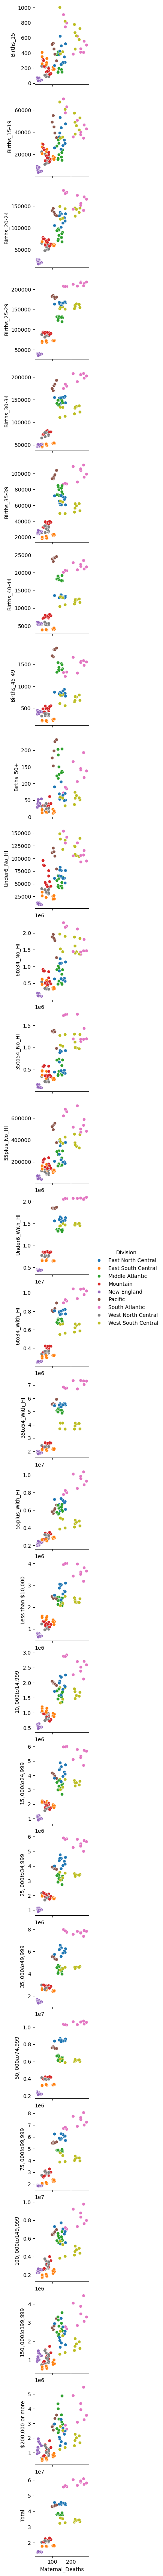

In [40]:
sns.pairplot(data = df, hue = "Division", y_vars = df.columns[4:], x_vars = "Maternal_Deaths")

In [41]:
X = np.array(df[df.columns[4:]])
y = np.array(df.Maternal_Deaths)
pop = np.diag(df.Population)
y.shape

(85,)

In [42]:
pop_scale = np.linalg.inv(pop)

In [43]:
X_scale = np.matmul(pop_scale, X)*1000000
y_scale = np.matmul(pop_scale,y)*1000000

(array([ 4.,  3.,  1.,  7.,  8.,  3.,  8., 11.,  8., 15.,  4.,  1.,  2.,
         0.,  0.,  2.,  2.,  4.,  1.,  1.]),
 array([1.10766006, 1.3822351 , 1.65681015, 1.93138519, 2.20596024,
        2.48053528, 2.75511032, 3.02968537, 3.30426041, 3.57883546,
        3.8534105 , 4.12798555, 4.40256059, 4.67713563, 4.95171068,
        5.22628572, 5.50086077, 5.77543581, 6.05001086, 6.3245859 ,
        6.59916095]),
 <BarContainer object of 20 artists>)

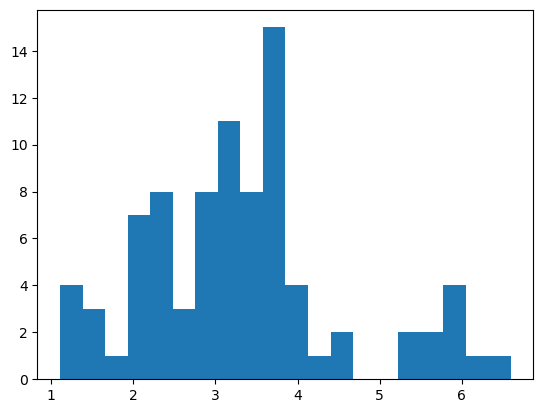

In [44]:
plt.hist(y_scale,bins = 20)

In [63]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [51]:
lin_reg = Pipeline([('scale', StandardScaler()), ('lin_reg',LinearRegression())])
lin_reg.fit(X_scale,y_scale)
print(lin_reg['lin_reg'].coef_)

[ 2.09059038e-01  1.72065157e+00  9.70209115e-01  1.48410498e+00
  9.37881016e-01 -1.85213664e+00  6.03167341e-01 -4.15160397e-02
 -4.01125589e-01  3.87455813e-02 -1.70499204e+00 -2.55386874e-02
  2.49050069e+00  8.35070856e-01  4.06005043e-02  1.85167945e+00
  2.26039325e+00  2.22890720e+00  1.33258251e-03  8.88263924e-01
  3.11760351e+00  1.61990254e+00  1.76951629e+00  1.46859674e+00
  4.29784311e+00  2.17274119e+00  4.97897179e+00 -6.64951365e+00]


c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+01, tolerance: 1.230e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn

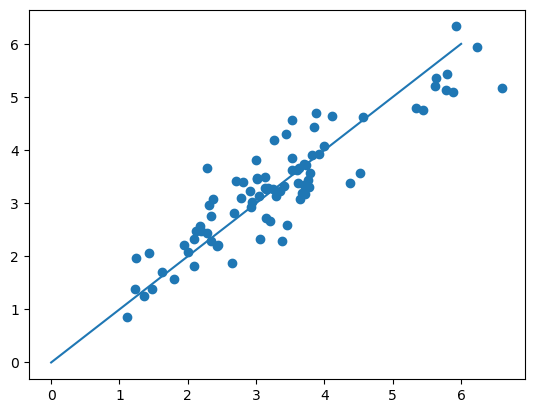

[ 0.29738516  1.61279644  0.60566171  1.58880635  0.85360597 -1.8927447
  0.59707675  0.07521784 -0.39336195  0.11697566 -1.09743436  0.46183213
  2.56180279  0.90559805  0.58997457  1.99987546  2.78917206  0.26832681
 -1.22894566 -1.84740159  0.79018362 -1.04473945 -0.88824531 -0.41744322
  0.31514542 -1.18395573  0.53091841  0.59998713]


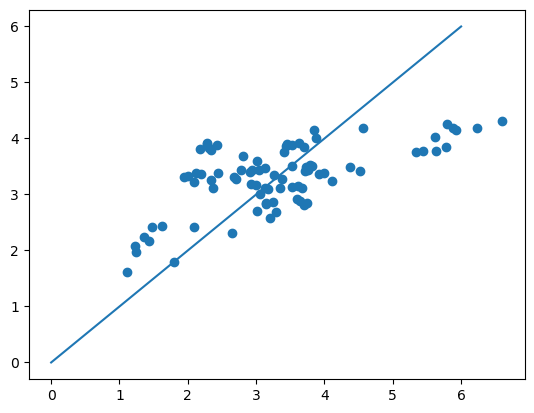

[ 0.         -0.          0.          0.35010702  0.         -0.
 -0.09951451 -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.25351656  0.16798278  0.
 -0.         -0.         -0.         -0.         -0.01376752 -0.23444423
 -0.          0.          0.         -0.        ]


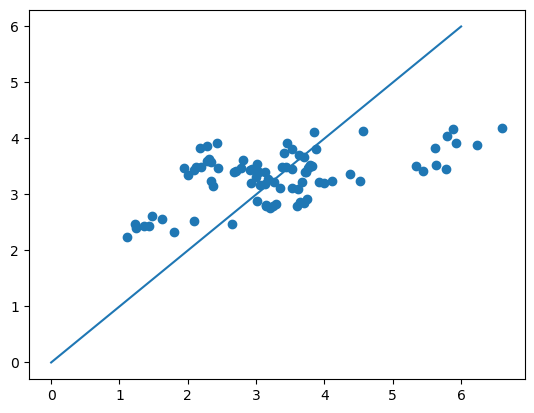

[ 0.          0.          0.16625807  0.0386601  -0.         -0.
 -0.00526385 -0.         -0.         -0.          0.          0.
  0.          0.          0.         -0.28481266  0.          0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


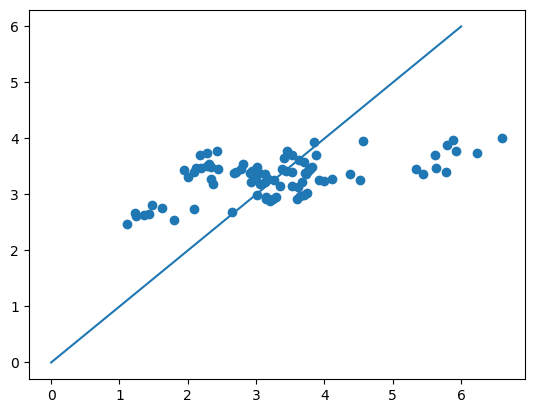

[ 0.          0.          0.12575953  0.01481097 -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.23412899  0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


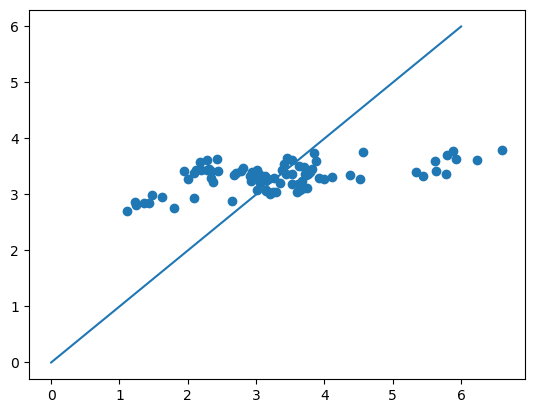

[ 0.          0.          0.07617221  0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.18114659 -0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


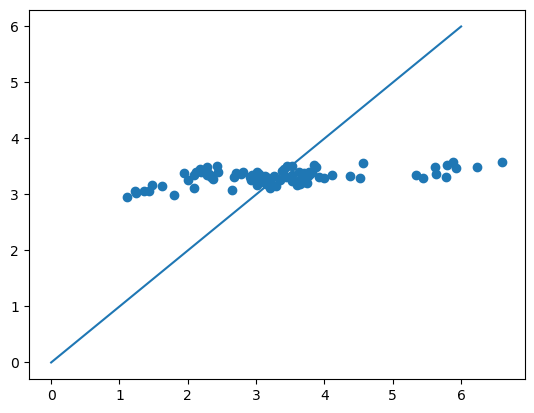

[ 0.          0.          0.0179699   0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.12290347 -0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.        ]


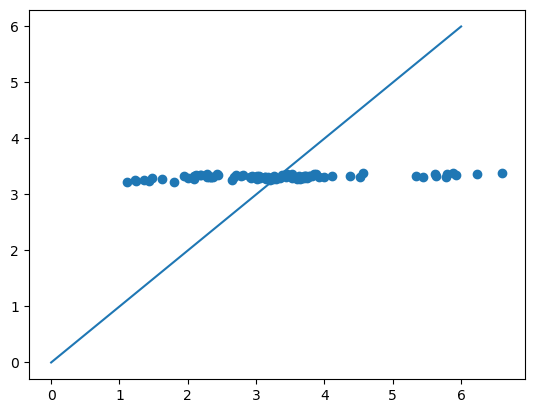

[ 0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.03579585 -0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.        ]


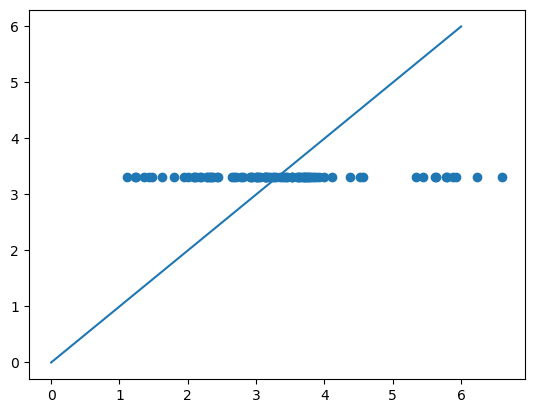

[ 0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.
  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.]


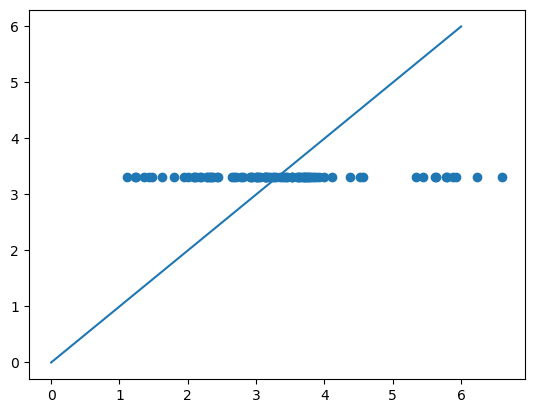

[ 0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.
  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.]


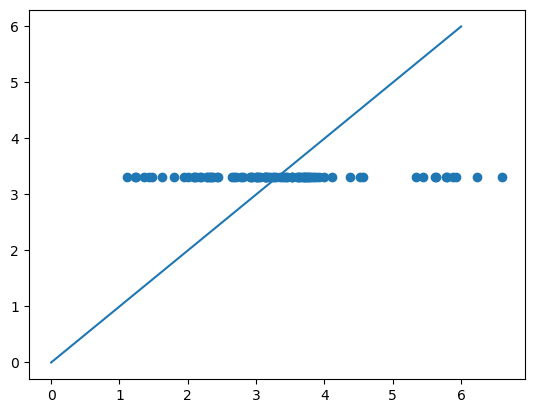

[ 0.  0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.
  0.  0.  0.  0.  0. -0. -0. -0. -0. -0.]


In [66]:
alphas = [j/10 for j in range(0,10)]
for alpha in alphas:
    lasso_reg = Pipeline([('scale', StandardScaler()), ('lasso',Lasso(alpha = alpha))])
    lasso_reg.fit(X_scale, y_scale)
    y_scale_pred = lasso_reg.predict(X_scale)
    plt.scatter(y_scale, y_scale_pred)
    plt.plot([0,6],[0,6])
    plt.show()
    print(lasso_reg['lasso'].coef_)

[ 0.         -0.          0.          0.35010702  0.         -0.
 -0.09951451 -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.25351656  0.16798278  0.
 -0.         -0.         -0.         -0.         -0.01376752 -0.23444423
 -0.          0.          0.         -0.        ]


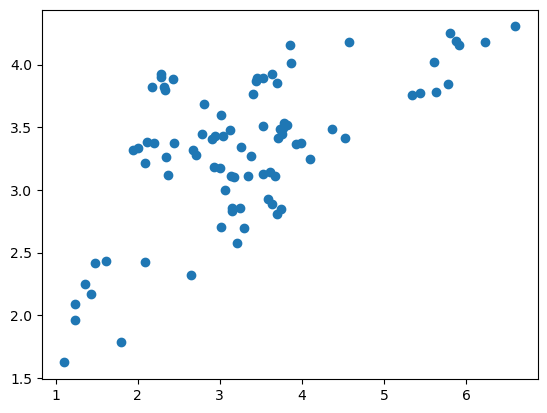

In [68]:
lasso_reg = Pipeline([('scale', StandardScaler()), ('lasso',Lasso(alpha = 1/10))])
lasso_reg.fit(X_scale, y_scale)
y_scale_pred = lasso_reg.predict(X_scale)
plt.scatter(y_scale, y_scale_pred)
print(lasso_reg['lasso'].coef_)